In [12]:
import subprocess

# run c++ program main

subprocess.run(["./main", "data/a280.tsp", "random_search", "1"])

Best cost: 29809.7
Mean: 34109
Standard deviation: 952.934
Iterations: 249520
Evaluations: 249520
Running time: 1
Best solution: 234 210 167 188 76 26 130 217 218 191 120 83 216 65 53 171 246 229 231 6 227 78 98 208 247 141 44 86 187 147 123 101 47 128 64 81 49 176 29 239 166 173 263 279 240 36 262 275 73 22 102 99 70 106 215 197 212 232 251 126 103 28 127 157 144 269 104 35 204 196 9 138 3 0 8 276 222 258 203 237 11 165 108 68 72 168 112 224 265 250 244 79 88 245 259 7 19 61 170 248 238 243 225 255 193 42 23 1 178 13 159 74 184 198 179 87 175 85 201 257 219 207 268 205 17 236 220 139 149 223 40 115 63 95 189 177 233 105 143 142 261 10 34 54 55 32 57 158 94 89 124 146 226 4 75 266 132 14 122 161 163 60 43 260 214 92 100 24 253 242 50 109 256 25 180 164 58 154 172 185 16 152 38 15 278 264 82 182 30 199 153 45 271 90 133 31 209 169 272 18 84 77 140 202 277 131 241 41 121 136 59 46 51 192 206 137 5 117 113 183 119 80 148 213 107 254 116 174 162 270 27 156 230 52 33 195 56 235 66 118 135 1

CompletedProcess(args=['./main', 'data/a280.tsp', 'random_search', '1'], returncode=0)

In [1]:
# instances and optimal solutions
instances = {
    "data/a280.tsp": 2579,
    "data/ch130.tsp": 6110,
    "data/ch150.tsp": 6528,
    "data/d198.tsp": 15780,
    "data/d493.tsp": 35002,
    "data/d657.tsp": 48912,
    "data/pcb442.tsp": 50778,
    "data/u724.tsp": 41910,

}


In [13]:
RANDOM_SEARCH = "random_search"
RANDOM_WALK = "random_walk"
GREEDY_CYCLE = "greedy_cycle"
LOCAL_SEARCH = "local_search"
MULTIPLE_START_LOCAL_SEARCH = "msls"

In [150]:
# calculate quality, minimization problem
def calculate_quality(optimal_value, value):
    return (optimal_value - value) / optimal_value

In [79]:
def decode_results(output):
    # Split the output into lines
    lines = output.split("\n")
    results = {}

    # Initialize variables to hold the solutions and partial results
    best_solution = []
    worst_solution = []
    partial_results = []
    reading_partial_results = False

    # Iterate over the lines
    for line in lines:
        # Split the line into key and value
        key_value = line.split(":")

        # If we are reading partial results
        if reading_partial_results:
            if line.strip() == "":
                reading_partial_results = False
            else:
                partial_results.append(tuple(map(float, line.split(":"))))
            continue

        # If the line contains a result, add it to the dictionary
        if len(key_value) == 2:
            key = key_value[0].strip()
            value = key_value[1].strip()

            # Handle the solutions and partial results separately
            if key == "Best solution":
                best_solution = [int(x) for x in value.split()]
            elif key == "Worst solution":
                worst_solution = [int(x) for x in value.split()]
            elif key == "Partial results":
                reading_partial_results = True
            else:
                results[key] = float(value)

    # Add the solutions and partial results to the results dictionary
    results["Best solution"] = best_solution
    results["Worst solution"] = worst_solution
    results["Partial results"] = partial_results
    return results

In [81]:
def run(instance, algorithm, settings):
    command = " ".join(["./main", instance, algorithm, *settings])
    process = subprocess.Popen(command, stdout=subprocess.PIPE, stderr=subprocess.PIPE, shell=True)
    # Read the output
    output, err = process.communicate()

    # Decode the output from bytes to string
    output = output.decode()

    return decode_results(output)

def run_random_search(instance, running_time):
    return run(instance, RANDOM_SEARCH, [str(running_time)])

def run_random_walk(instance, running_time):
    return run(instance, RANDOM_WALK, [str(running_time)])

def run_greedy_cycle(instance, starting_node):
    return run(instance, GREEDY_CYCLE, [str(starting_node)])

def run_greedy_local_search(instance, initial_solution_type):
    return run(instance, LOCAL_SEARCH, [initial_solution_type, "greedy"])

def run_steepest_local_search(instance, initial_solution_type):
    return run(instance, LOCAL_SEARCH, [initial_solution_type, "steepest"])

def run_greedy_msls(instance, initial_solution_type, running_time):
    return run(instance, MULTIPLE_START_LOCAL_SEARCH, [initial_solution_type, "greedy", str(running_time)])

def run_steepest_msls(instance, initial_solution_type, running_time):
    return run(instance, MULTIPLE_START_LOCAL_SEARCH, [initial_solution_type, "steepest", str(running_time)])


 



# Comparison of the performance of 5 algorithms and implemented types of neighborhoods on all problem instances – plots:

    Quality = distance from the optimum , the average and the best case (optionally: also the worst case).
    Running time (average)
    Efficiency of algorithms (average) – i.e., quality over time (suggest a good measure and justify your choice)
    G,S: average number of algorithm steps (step = changing the current solution)
    G,S,R,RW: average number of evaluated (i.e., visited – full or partial evaluation) solutions

In [84]:
# Statistical evaluation on at least 8 instances, in each case 10 runs of the algorithm in order to obtain reliable performance information.

# 1. run random search 10 times on a280.tsp
# import defaultdict

from collections import defaultdict

RUNNING_TIME = 1
results = {}
for instance in instances:
    results[instance] = defaultdict(list)
    for i in range(1):
        results[instance]["random_search"].append(run_random_search(instance, RUNNING_TIME))
        results[instance]["random_walk"].append(run_random_walk(instance, RUNNING_TIME))
        results[instance]["greedy_msls"].append(run_greedy_msls(instance, "random_search", RUNNING_TIME))
        results[instance]["steepest_msls"].append(run_steepest_msls(instance, "random_search", RUNNING_TIME))
        


In [116]:
# todo

# G,S – plot: quality of the initial solution vs. quality of the final solution (at least 200 repetitions, use small points) for several interesting instances; interesting instances are the ones that demonstrate some heterogeneity. For the charts shown, provide and interpret the correlation

In [151]:
# plot: quality of the initial solution vs. quality of the final solution (at least 200 repetitions, use small points) for several interesting instances; interesting instances are the ones that demonstrate some heterogeneity. For the charts shown, provide and interpret the correlation
initial_solutions = []
final_solutions = []
for i in range(200):
    for instance in instances:
        result = run_greedy_local_search(instance, "random_search")
        initial_solutions.append(calculate_quality(instances[instance], result["Initial solution cost"]))
        final_solutions.append(calculate_quality(instances[instance], result["Best cost"]))
        break

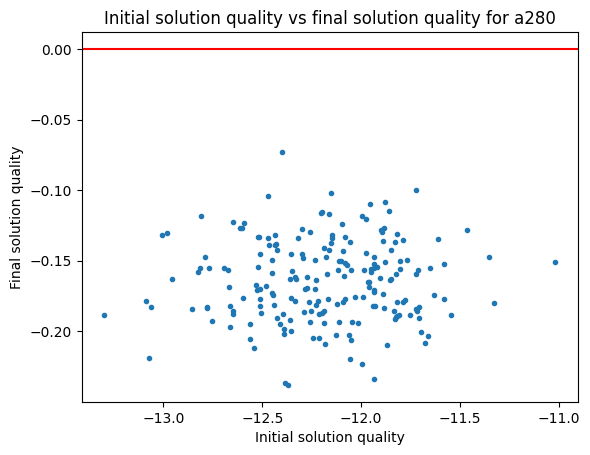

In [152]:
# plot initial_solutions vs final_solutions
import matplotlib.pyplot as plt
plt.scatter(initial_solutions, final_solutions)
# add a line for optimal solution on y axis
optimal_value = instances["data/a280.tsp"]
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel("Initial solution quality")
plt.ylabel("Final solution quality")
plt.title("Initial solution quality vs final solution quality for a280")
plt.show()


# G,S – plot: the number of restarts (up to at least 300, horizontal axis) in multi-random start vs. average and best of solutions found so far, for two (or a few) selected instances. Is it worth repeating the algorithm? If so, how many times?

In [153]:
result = run_greedy_msls("data/a280.tsp", "random_search", 10)
print(len(result["Partial results"]))

445


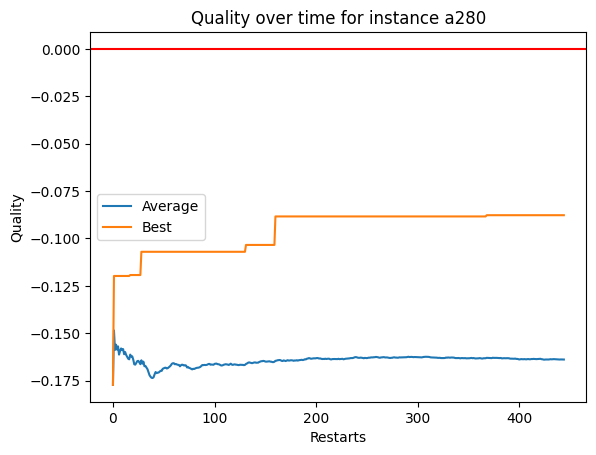

In [155]:
average_over_time = []
best_over_time = []

for i in range(len(result["Partial results"])):
    value = calculate_quality(instances["data/a280.tsp"],result["Partial results"][i][1])
    last_average = average_over_time[-1] if len(average_over_time) > 0 else 0
    average_over_time.append((last_average * i + value) / (i + 1))
    best = max(best_over_time[-1], value) if len(best_over_time) > 0 else value
    best_over_time.append(best)

plt.plot(average_over_time, label="Average")
plt.plot(best_over_time, label="Best")
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel("Restarts")
plt.ylabel("Quality")

plt.title(f"Quality over time for instance a280")
plt.legend()

plt.show()



# Objective assessment of the similarity of locally optimal solutions found for two selected instances, and the assessment of their similarity to the global optimum. For example: a plot of at least 100 points: x=quality, y=similarity

1. choose two instances
2. get the optimal solution
3. run local search at least 100 times
4. for each locally optimal solution calculate similarity to optimal solution and quality


In [156]:
local_optimas = []
local_optimas_costs = []
for i in range(800):
    for instance in instances:
        result = run_greedy_local_search(instance, "random_search")
        local_optimas.append(result["Best solution"])
        local_optimas_costs.append(calculate_quality(instances[instance],result["Best cost"]))
        break

In [118]:
# NAME : ./TSPLIB/a280.tsp.optbc.tour
# TYPE : TOUR
# DIMENSION : 280
# TOUR_SECTION
# 1
# 2
# 242
# 243
# 244
# 241
# 240
from pathlib import Path
def read_optimal_tour(instance):
    instance_path = Path(instance)
    with open(instance_path.with_suffix(".opt.tour"), "r") as file:
        lines = file.readlines()
        tour_section = False
        tour = []
        for line in lines:
            if line.strip() == "TOUR_SECTION":
                tour_section = True
                continue
            if tour_section:
                if line.strip() == "-1":
                    break
                tour.append(int(line.strip()))
        return tour
    
optimal_tour = read_optimal_tour("data/a280.tsp")

In [157]:
def edges_similarity(solution1, solution2):
    # solution is a list of nodes

    # find edges in solution1
    edges1 = []
    for i in range(len(solution1) - 1):
        edges1.append((solution1[i], solution1[i + 1]))
        edges1.append((solution1[i + 1], solution1[i]))
    edges1.append((solution1[-1], solution1[0]))
    edges1.append((solution1[0], solution1[-1]))

    # find edges in solution2
    edges2 = []
    for i in range(len(solution2) - 1):
        edges2.append((solution2[i], solution2[i + 1]))
        edges2.append((solution2[i + 1], solution2[i]))
    edges2.append((solution2[-1], solution2[0]))
    edges2.append((solution2[0], solution2[-1]))

    # find common edges
    common_edges = set(edges1).intersection(set(edges2))

    # calculate similarity
    return len(common_edges) / len(edges1) * 100


similarities = [
    edges_similarity(optimal_tour, local_optimas[i])
    for i in range(len(local_optimas))
]

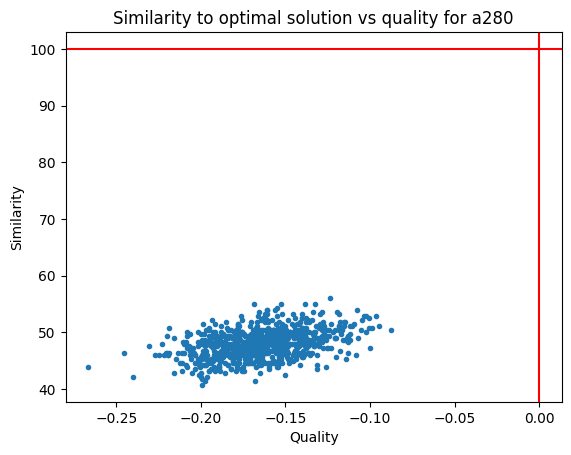

In [160]:
# plot similarities vs costs
plt.rcParams["lines.markersize"] = 3
plt.scatter(local_optimas_costs, similarities)
plt.axvline(x=0, color='r', linestyle='-')
plt.axhline(y=100, color='r', linestyle='-')
plt.xlabel("Quality")
plt.ylabel("Similarity")
plt.title("Similarity to optimal solution vs quality for a280")
plt.show()